## Apply Machine Learning algorithm to dataset after feature engineering

In [1]:
#import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load datasets after feature engineering

df=pd.read_csv('Train_cleaned.csv')
df_test=pd.read_csv('Test_cleaned.csv')

In [3]:
#new
# df_test_Product_id = df_test['Product_id']


In [4]:
#new
# df=df[['Loyalty_customer','Product_Category','Grade','Discount_avail','Minimum_price','Maximum_price','year','Selling_Price']]
# df_test=df_test[['Loyalty_customer','Product_Category','Grade','Discount_avail','Minimum_price','Maximum_price','year']]

In [5]:
#new
# x1_test = df_test.values

In [6]:
df.head() #head of the dataset

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,month,year,weekday,No_of_Week
0,37.0,2,1,10,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,8,2015,5,34
1,38.0,24,1,10,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,3,2016,6,12
2,9.0,447,1,7,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,8,2015,1,34
3,50.0,23,1,1,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,3,2016,0,13
4,7.0,63,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,3,2016,1,13


In [7]:
df_test.head() #head of the test set

,Product_id,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,month,year,weekday,No_of_Week
0,SCHE4YSTDVPVZVXW,39.0,205,0,10,0,90,0,380.0,16.0,2576.0,3340,1,2016,2,2
1,ACCEGCATKHNRXUHW,49.0,3,1,10,0,87,0,393.0,16.0,1202.0,1955,8,2015,6,34
2,NKCE6GJ5XVJDXNNZ,1.0,183,0,9,2,55,0,493.0,9.0,7175.0,15715,11,2015,5,46
3,NKCEB8BK3ZXDHDHM,8.0,358,1,7,3,86,0,303.0,16.0,5404.0,13078,11,2015,5,47
4,TOPEFDXSAHRNPF94,33.0,167,0,9,0,27,0,567.0,16.0,4069.0,6244,5,2015,2,19


In [8]:
df=df[df['Selling_Price']>0] #taking only positive values

In [9]:
#split the data into feature and label

X = df.drop(['Selling_Price'],axis=1).values 
y = np.log1p(df['Selling_Price'].values) #taking log because the data is skewed

In [10]:
#save product id for final submission

df_test_Product_id = df_test['Product_id']
x1_test = df_test.drop(['Product_id'],axis=1).values

In [11]:
#extract feature only for visulization of important fields

feature = df.drop(['Selling_Price'],axis=1).columns

In [12]:
#split the data in train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [13]:
#scale the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
#scale test dataset

x1_train = scaler.transform(X)
x1_test = scaler.transform(x1_test)

In [15]:
#import the matrices

from sklearn.metrics import r2_score, mean_squared_log_error, mean_squared_error

In [16]:
#import gridsearch and xgboost for model creation 

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
XGBRegressor()

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [17]:
#hyper parameter tuning of xgboost

# xgb = XGBRegressor()
# parameters_xgb = {
#     'n_estimators': [360,400],
#     'max_depth': [8,9],
#     'learning_rate':[0.1],
#     'reg_lambda':[0.7,1]
#     }
# cv_xgb = GridSearchCV(xgb, parameters_xgb, cv=5) 
# cv_xgb.fit(X_train, y_train)

In [18]:
# cv_xgb.best_params_
#{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 220, 'reg_lambda': 0.1}
# {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 360, 'reg_lambda': 0.7}

In [19]:
#fitting the model

model_xgb = XGBRegressor(n_estimators=360, max_depth=8,learning_rate=0.1,reg_lambda=0.7)
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=360, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=0.7, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
#prediction accuracy

pred_xgb = np.expm1(model_xgb.predict(X_test))

y_true = np.expm1(y_test) #as log has been taken on target variable, exponential will revert it

print("root_mean_squared_error=",np.sqrt(mean_squared_error(y_true,pred_xgb)))
print("r2_score=",r2_score(y_true,pred_xgb))
print("rmsle=",np.sqrt(mean_squared_log_error(y_true,pred_xgb)))

root_mean_squared_error= 325.915745837061
r2_score= 0.9880585217547456
rmsle= 0.08283378068340048


In [21]:
#accuracy in train set

pred_xgb_train = np.expm1(model_xgb.predict(X_train))

y_true_train = np.expm1(y_train)

print("root_mean_squared_error=",np.sqrt(mean_squared_error(y_true_train,pred_xgb_train)))
print("r2_score=",r2_score(y_true_train,pred_xgb_train))
print("rmsle=",np.sqrt(mean_squared_log_error(y_true_train,pred_xgb_train)))

root_mean_squared_error= 20.13607472575923
r2_score= 0.9999530429499902
rmsle= 0.004063019741184762


In [22]:
max(0,100-np.sqrt(mean_squared_log_error(y_true,pred_xgb))) #error score as per competition in train set

99.9171662193166

In [23]:
max(0,100-np.sqrt(mean_squared_log_error(y_true_train,pred_xgb_train))) #error score as per competition in test set

99.99593698025882

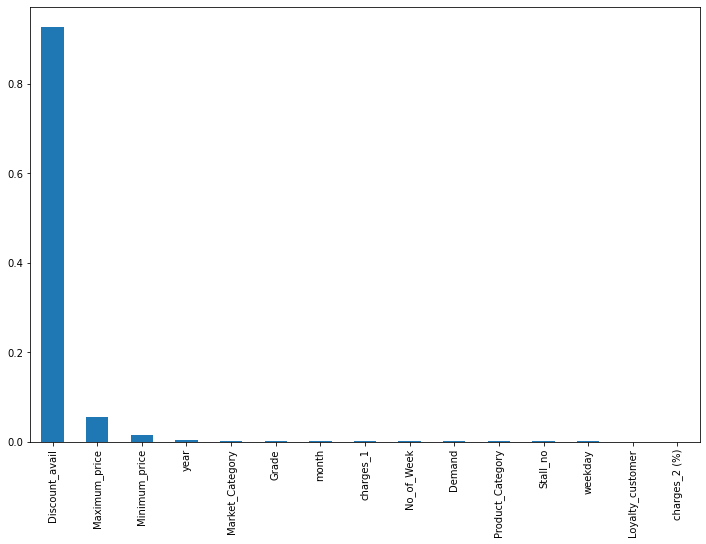

In [24]:
#feature importance

imp_feat=pd.Series(model_xgb.feature_importances_,index=feature)
plt.figure(figsize=(12,8))
imp_feat.sort_values(ascending=False).plot(kind='bar')

In [25]:
df.head()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,month,year,weekday,No_of_Week
0,37.0,2,1,10,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,8,2015,5,34
1,38.0,24,1,10,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,3,2016,6,12
2,9.0,447,1,7,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,8,2015,1,34
3,50.0,23,1,1,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,3,2016,0,13
4,7.0,63,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,3,2016,1,13


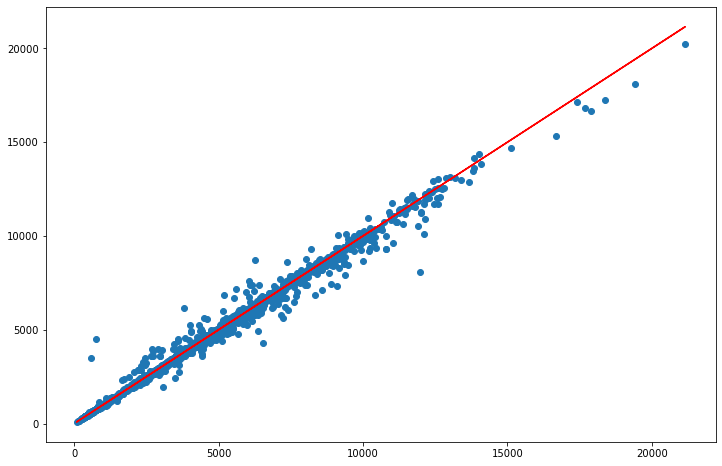

In [26]:
#plotting the prediction with actual value

plt.figure(figsize=(12,8))
plt.scatter(y_true,pred_xgb)
plt.plot(y_true,y_true,'r')

**We are going to add this prediction to the train and test dataset as a column and build a second predictive model on this new dataset**

In [27]:
df['pred_price'] = np.expm1(model_xgb.predict(x1_train)) #adding in train set
df.sample(10)

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price,month,year,weekday,No_of_Week,pred_price
3855,33.0,14,0,4,0,78,0.0,261.0,14.0,3567.0,4552.0,4282.918200,9,2015,4,39,4313.643555
5865,9.0,57,0,4,0,48,0.0,249.0,17.0,2988.0,6569.0,5003.392032,2,2016,5,8,4857.473633
4046,45.0,65,1,4,2,6,0.0,227.0,12.0,2312.0,4166.0,3469.543011,9,2015,4,39,3445.764404
2981,35.0,469,1,1,0,19,0.0,101.0,14.0,3560.0,5173.0,4473.162639,9,2015,2,39,4438.200684
5363,42.0,56,0,5,0,14,0.0,NaN,11.0,451.0,834.0,914.118579,5,2015,3,19,881.911133
143,3.0,113,1,9,0,46,0.0,465.0,7.0,1491.0,3778.0,3081.491424,9,2015,1,39,2849.360352
112,23.0,24,1,7,0,76,0.0,314.0,11.0,7017.0,10671.0,9076.052700,3,2016,0,13,9051.316406
4272,15.0,452,0,7,0,52,0.0,265.0,16.0,3254.0,4730.0,4236.104304,9,2015,5,39,4226.266602
2937,16.0,93,0,2,2,16,0.0,130.0,8.0,2723.0,5311.0,4149.794979,2,2016,6,7,4146.386230
1943,34.0,55,0,10,0,84,0.0,377.0,15.0,828.0,3479.0,2497.244288,9,2015,1,39,2502.838135


In [28]:
df_test['pred_price'] = np.expm1(model_xgb.predict(x1_test)) #adding in test set
df_test.sample(10)

,Product_id,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,month,year,weekday,No_of_Week,pred_price
3078,NKCEAP3S6G8ZEGB6,5.0,108,0,3,0,82,0,249.0,8.0,1692.0,3098,12,2015,6,49,2624.979980
2813,RTREFDXTZ4GGGAEX,14.0,448,0,8,0,37,0,280.0,4.0,2512.0,3262,2,2016,0,6,3174.762451
1691,CAGE9A68NZMEVPPE,1.0,220,0,7,0,31,0,302.0,11.0,8489.0,11535,11,2015,3,47,10364.989258
3356,DIAEJ6Z8BEDTGGYY,33.0,211,1,2,0,38,0,129.0,7.0,3571.0,4629,10,2014,6,43,4279.201660
325,PBXE6EF4PSJX9WXH,42.0,57,1,7,0,79,0,279.0,6.0,1296.0,6317,1,2016,1,1,4047.384521
181,FABE92NVHZHSFHGT,17.0,176,1,7,0,36,0,298.0,17.0,2533.0,3632,9,2015,5,39,3351.731934
3133,BRAE4S2FYF4RN49J,13.0,30,0,8,0,3,0,216.0,8.0,1161.0,2167,8,2015,3,34,1827.959106
1208,NKCE5HYVQV5ZKAMB,32.0,58,0,4,1,90,0,214.0,17.0,4140.0,5673,1,2016,2,1,4991.993652
1970,JWSE9CZDPATTCRX7,2.0,423,1,9,0,50,0,472.0,15.0,5485.0,9314,8,2015,5,33,8038.541992
1580,ACCE8XZMKHTPSVFW,2.0,452,0,10,0,20,0,399.0,15.0,5239.0,7453,8,2015,6,33,6208.023438


In [29]:
#split into feature and label

X = df.drop(['Selling_Price'],axis=1).values 
y = np.log1p(df['Selling_Price'].values)

In [30]:
x1_test = df_test.drop(['Product_id'],axis=1).values #test set

In [31]:
#new
# x1_test = df_test.values

In [32]:
feature = df.drop(['Selling_Price'],axis=1).columns #save features in a variable 

In [33]:
#split the data in train and test with very low test, so that model train vary well

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01,random_state=42) 

In [34]:
#scale the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
x1_test = scaler.transform(x1_test) #scale the test

In [36]:
# xgb = XGBRegressor()
# parameters_xgb = {
#     'n_estimators': [220,250,300],
#     'max_depth': [8,9,10],
#     'learning_rate':[0.1,0.12],
#     'reg_lambda':[0.1]
#     }
# cv_xgb = GridSearchCV(xgb, parameters_xgb, cv=5) 
# cv_xgb.fit(X_train, y_train)

In [37]:
# cv_xgb.best_params_

In [38]:
#fit the regressor with paramete values found from GridSearchCV

model_xgb = XGBRegressor(n_estimators=400, max_depth=8,learning_rate=0.1,reg_lambda=0.8)
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=0.8, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
#test accuracy check

pred_xgb = np.expm1(model_xgb.predict(X_test))

y_true = np.expm1(y_test)

print("root_mean_squared_error=",np.sqrt(mean_squared_error(y_true,pred_xgb)))
print("r2_score=",r2_score(y_true,pred_xgb))
print("rmsle=",np.sqrt(mean_squared_log_error(y_true,pred_xgb)))

root_mean_squared_error= 288.89192647025857
r2_score= 0.9942454980350749
rmsle= 0.04394293650921652


In [40]:
#train accuracy check

pred_xgb_train = np.expm1(model_xgb.predict(X_train))

y_true_train = np.expm1(y_train)

print("root_mean_squared_error=",np.sqrt(mean_squared_error(y_true_train,pred_xgb_train)))
print("r2_score=",r2_score(y_true_train,pred_xgb_train))
print("rmsle=",np.sqrt(mean_squared_log_error(y_true_train,pred_xgb_train)))

root_mean_squared_error= 15.19871833708491
r2_score= 0.9999733039825921
rmsle= 0.0031785127587756618


In [41]:
#error as per formul of competition

print(max(0,100-np.sqrt(mean_squared_log_error(y_true,pred_xgb))))
print(max(0,100-np.sqrt(mean_squared_log_error(y_true_train,pred_xgb_train))))

99.95605706349079
99.99682148724122


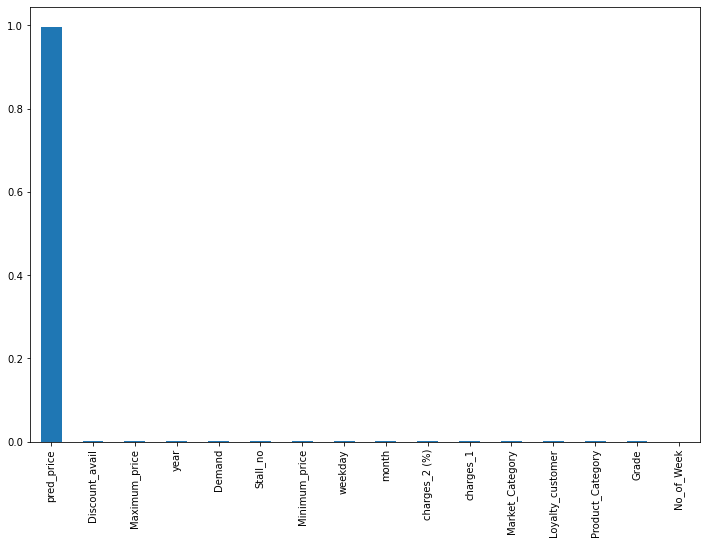

In [42]:
#feature importance

imp_feat=pd.Series(model_xgb.feature_importances_,index=feature)
plt.figure(figsize=(12,8))
imp_feat.sort_values(ascending=False).plot(kind='bar')

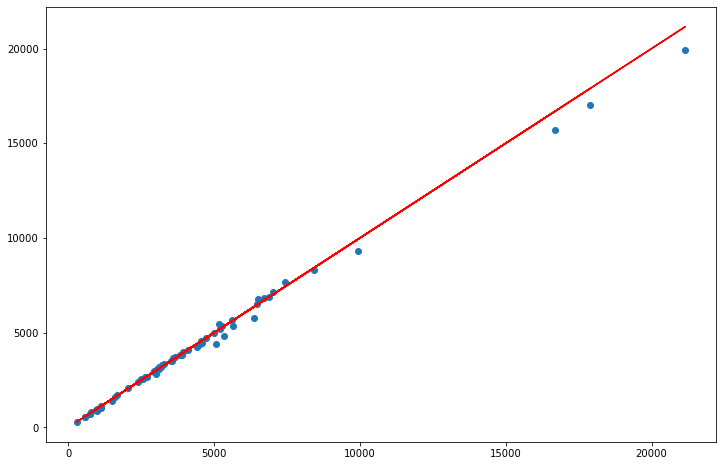

In [43]:
#how fit the prediction

plt.figure(figsize=(12,8))
plt.scatter(y_true,pred_xgb)
plt.plot(y_true,y_true,'r')

In [44]:
#convert the prediction into submission file

# pred_final = np.expm1(model_xgb.predict(x1_test))
# d_pred={'Product_id':df_test_Product_id,'Selling_Price':pred_final}
# pred_csv = pd.DataFrame(d_pred)

# pred_csv.to_csv('prediction7.csv', index = False)